EDA Credit Assignment

Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


Objective:
    
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.
And if applicant are not capable of paying loan,such application should be rejected .

Importing the libraries

In [239]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [240]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Read in the Data set.

In [241]:
#read the data set of "EDA Data set" in inp1.
inp1=pd.read_csv('application_data.csv')

In [242]:
#Print the head of the data frame to see the header is OK
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
#Print the tail of the data frame to see any unwanted rows at last
inp1.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [244]:
inp1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,...,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,...,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000

In [245]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


MCAR: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
MAR: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
MNAR: It stands for Missing not at random (there is a specific reason behind the missing value

In [246]:
#Check is there any Missing value in Target column
inp1.TARGET.isnull().sum()

0

In [247]:
#Check is missing value of other columns as well
inp1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [248]:
inp1.shape

(307511, 122)

its difficult to visually identify the missing value columns, as column numbers are very high,
Better idea is to find out missing value % and drop high missing value column(MCAR).Considering threshold as 30%

In [249]:
# Columns with missing values greater than this threshold will be dropped
missing_threshold = 0.3

In [250]:
# Calculate the percentage of missing values in each column
missing_percentages = inp1.isnull().sum() / len(inp1)

In [251]:
missing_percentages.sort_values(ascending=False).head(60)*100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [252]:
 #Get the names of columns with missing values greater than the threshold
columns_to_drop = missing_percentages[missing_percentages > missing_threshold].index

In [253]:
inp2=inp1.drop(columns=columns_to_drop)# >30 Missing Value dropped

In [254]:
inp2.shape

(307511, 72)

In [255]:
#Lets check the current missing value distribution

In [256]:
((inp2.isnull().sum()/len(inp2))*100).sort_values(ascending=False).head(25)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000


Still we have Missing values in Multiple columns,lets Analyse it and decide to keep or drop.

In [257]:
#EXT_SOURCE_3  have higher missing value- by defenition it is the normalized score of customer from external sources.
#Let See the value distribution of Source 3 ans Source 2





In [258]:
inp2.EXT_SOURCE_2.describe() #Checking disribution of Souce 2

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [259]:
inp2.EXT_SOURCE_3.describe() #Checking disribution of Souce 2

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [260]:
#External Source 3 and 2 have almost similar distribution,lets fill the missing value of ext source 3 with soucre 2
#For that check is there any missing value of ext_source_2
inp2.EXT_SOURCE_2.isnull().sum()

660

In [261]:
#Ext source 2 have less missing value,so let go head and fill missing value of ext source 3 with ext source 2
inp2.EXT_SOURCE_3.fillna(inp2.EXT_SOURCE_2,inplace=True)
inp2.EXT_SOURCE_2.fillna(inp2.EXT_SOURCE_3,inplace=True)

In [262]:
#Find commonly missing  rows
inp2.EXT_SOURCE_2.isnull().sum()

230

In [263]:
inp2.EXT_SOURCE_3.isnull().sum()

230

In [264]:
#Since we dont want to drop a customer in the analysis and one approch may is  fill with Mean ,Here since data is very less
#keeping as is
#inp2.EXT_SOURCE_3.fillna(inp2.EXT_SOURCE_3.mean(),inplace=True)
#inp2.EXT_SOURCE_2.fillna(inp2.EXT_SOURCE_2.mean(),inplace=True)

In [265]:
# So now we are done with Highest missing value contributor.
# Lets go and do it for other missing value.

In [266]:
inp2.AMT_REQ_CREDIT_BUREAU_YEAR.describe()# Checking Min.Max Percentile distribution

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [267]:
#Looks huge difference between 75% percentile and Max

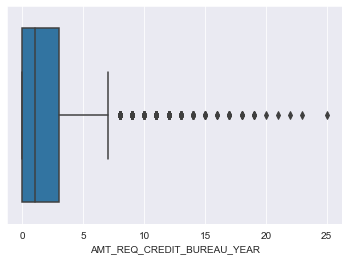

In [268]:
#Lets Plot a BOX plot and see the outlier
sns.boxplot(inp2.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [269]:
#Outliers present,lets see the value and its count
inp2.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [270]:
#As per the descreption it is  phone call made to applicant and so lets go and fill it with maximum number of occurance.
inp2.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)

In [271]:
# Now lets fill Credit Burea_Quarter ,other category such as week ,day and hour are not making sense ,
#considering the fact that we have cumilative figure
inp2.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [272]:
inp2.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)# filling with highest occurance

In [273]:
#Remaining missing value col
Rest_Missing_per=inp2.isnull().sum()/len(inp2)*100
Rest_missing_columns = Rest_Missing_per[Rest_Missing_per >0].index
Rest_missing_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [274]:
#Lets see the values of below list .

L=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE']

for x in L:
    VC=inp2[x].value_counts()
    print(VC)    

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64
450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int6

#From above excersise its clear that we have
#Categorical value,Categorical numerical values and Continuous numerical value.
#Lets impute categorical values with mode first.

In [275]:
inp2.NAME_TYPE_SUITE.fillna(inp2.NAME_TYPE_SUITE.mode()[0],inplace=True)

inp2.CNT_FAM_MEMBERS.fillna(inp2.CNT_FAM_MEMBERS.mode()[0],inplace=True)

inp2.OBS_30_CNT_SOCIAL_CIRCLE.fillna(inp2.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

inp2.DEF_30_CNT_SOCIAL_CIRCLE.fillna(inp2.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

inp2.OBS_60_CNT_SOCIAL_CIRCLE.fillna(inp2.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

inp2.DEF_60_CNT_SOCIAL_CIRCLE.fillna(inp2.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)



In [276]:
#Lets see the distribution now
((inp2.isnull().sum()/len(inp2))*100).sort_values(ascending=False).head(25)

AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.074794
EXT_SOURCE_3                   0.074794
AMT_ANNUITY                    0.003902
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_2                0.000000
SK_ID_CURR                     0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_8                0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000


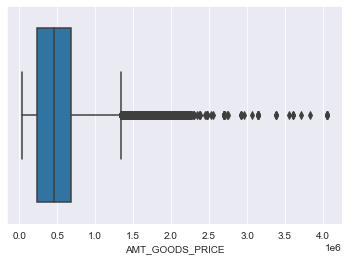

In [277]:
#Lets check AMT_Good_Price and AMT_Annuity
sns.boxplot(inp2.AMT_GOODS_PRICE)
plt.show()

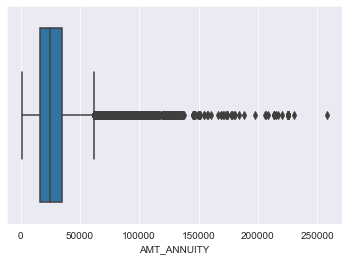

In [278]:
sns.boxplot(inp2.AMT_ANNUITY)
plt.show()


Standard deviation seems very high for AMT_Good_Price and AMT_Annuity columns Good approach is to  drops this missing rows as missing value is very minimum.However as instructed in the EDA lecturing let keep as is ,since we are not applying any rules.

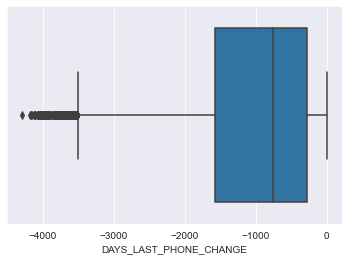

In [279]:
# Lets plot DAYS_LAST_PHONE_CHANGE
sns.boxplot(inp2.DAYS_LAST_PHONE_CHANGE)
plt.show()

There are outlier present in DAYS_LAST_PHONE_CHANGE as well,its better to drop missing value.Here lets keep as is

In [280]:
#Now remove few unwanted columns 

Unwanted_columns=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2',
                  'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
                  'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                  'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                  'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

In [281]:
inp2=inp2.drop(Unwanted_columns,axis=1)

In [282]:
inp2.shape

(307511, 42)

In [283]:
#Now we are left with 42 columns
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [284]:
inp2.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.650442,2.0,0.0,2.0,0.0,-617.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0


In [285]:
pd.options.display.max_columns = 50  # to display all columns
inp2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.072810e+05,3.072810e+05,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.144520e-01,5.081910e-01,1.417523,0.142944,1.400626,0.099717,-962.858788,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910571e-01,1.955621e-01,2.398395,0.446033,2.377224,0.361735,826.808487,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.925252e-01,3.689687e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659775e-01,5.388627e-01,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636805e-01,6.658549e-01,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.633634e-01,8.960095e-01,348.000000,34.000000,344.000000,24.000000,0.000000,261.000000,25.000000


In [286]:
#Few columns contain XNA,lets find out
Columns_XNA=inp2.columns[inp2.isin(['XNA']).any()]

In [287]:
Columns_XNA

Index(['CODE_GENDER', 'ORGANIZATION_TYPE'], dtype='object')

Now check outliers in the continous numenrical variable

Major approaches to the treat outliers:

Imputation,
Deletion of outliers,
Binning of values,
Cap the outlier.

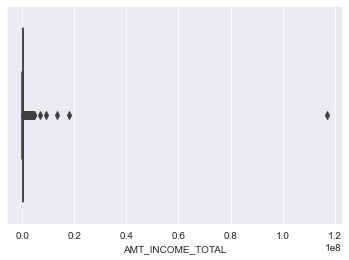

In [288]:
sns.boxplot(inp2.AMT_INCOME_TOTAL)
plt.show()

In [289]:
inp2.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [290]:
inp2.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

Huge difference between Max value and 99 th Quantile,We should remove the outlier,but in this analysis ,keeping as is.

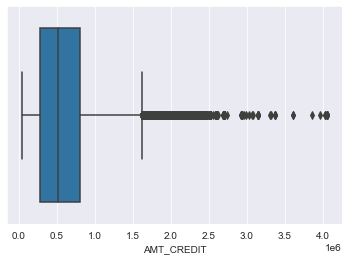

In [291]:
sns.boxplot(inp2.AMT_CREDIT)
plt.show()

In [292]:
inp2.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

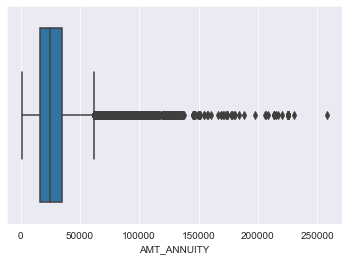

In [293]:
sns.boxplot(inp2.AMT_ANNUITY)
plt.show()

In [294]:
inp2.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

Huge difference between Max value and 99 th Quantile,We should remove the outlier,but in this analysis ,keeping as is.

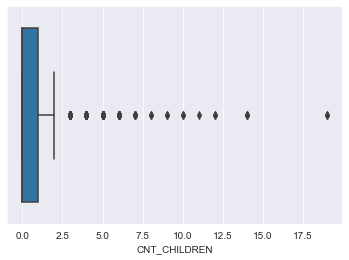

In [295]:
sns.boxplot(inp2.CNT_CHILDREN)
plt.show()

Looks like there is outlier in the Childerens data as well.

#Transforming the values of the column

In [296]:
inp2.DAYS_BIRTH=inp2.DAYS_BIRTH.apply(lambda x:abs(x)/365.25)# Converting Days to Year

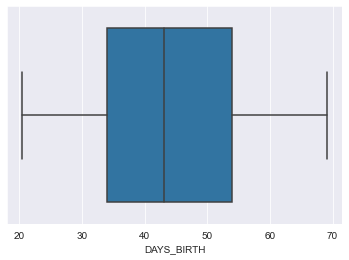

In [297]:
sns.boxplot(inp2.DAYS_BIRTH)
plt.show()

In [298]:
inp2.DAYS_EMPLOYED=inp2.DAYS_EMPLOYED.apply(lambda x:abs(x)/365.25) # Converting Days to Year

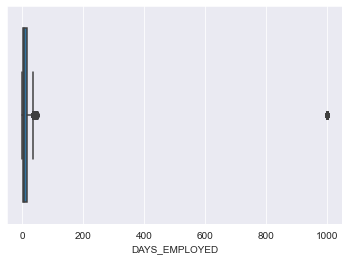

In [299]:
sns.boxplot(inp2.DAYS_EMPLOYED)
plt.show()

In [300]:
inp2.DAYS_EMPLOYED.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      6.075291
0.70     12.142368
0.90    999.980835
0.95    999.980835
0.99    999.980835
Name: DAYS_EMPLOYED, dtype: float64

In [301]:
#Done with important numerical features
#lets take few  important catogorical feature

In [302]:
Cat_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE']

In [303]:
for x in Cat_columns:
    VC=inp2[x].value_counts()
    print(VC) 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, 

#From Above Excersise ,identfied that Gendar and Organization type have a Un known Value XNA

Lets Check this two columns

In [304]:
inp2.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [305]:
#XNA in Gender catogory is very less ie 4 so we may drop rows
inp2= inp2[~(inp2['CODE_GENDER'] == 'XNA')]

In [306]:

inp2. ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221107
XNA                       0.180074
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036396
Business Entity Type 2    0.034318
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022370
Construction              0.021856
Business Entity Type 1    0.019456
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010953
Industry: type 3          0.010657
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [307]:
#XNA is very high in number so we have to drop this column from Analysis

In [308]:
inp2_Target1=inp2.loc[inp2["TARGET"]==1]   #Data with Defaulters ie Target =1
inp2_Target0=inp2.loc[inp2["TARGET"]==0]   #Data with all other cases category ie Target=0

In [309]:
inp2_Target1.shape

(24825, 42)

In [310]:
inp2_Target0.shape

(282682, 42)

In [311]:
inp2.TARGET.value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [312]:
#Majority of the data is target 0
#Calculating imbalence %
round(len(inp2_Target1)/len(inp2_Target0),2)*100


9.0

# Univarient Analysis

# Categorical unordered univariate analysis
#Unordered data do not have the notion of high-low, more-less etc.


In [313]:
#Gender

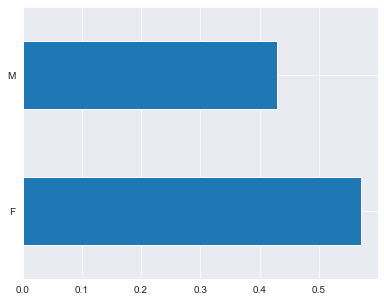

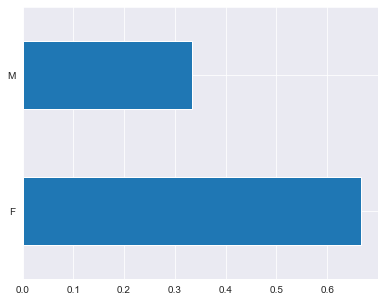

In [314]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1) 
inp2_Target1.CODE_GENDER.value_counts(normalize= True).plot.barh()
plt.show()
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
inp2_Target0.CODE_GENDER.value_counts(normalize= True).plot.barh()
plt.show()

[Text(0.5, 0, 'Gender')]

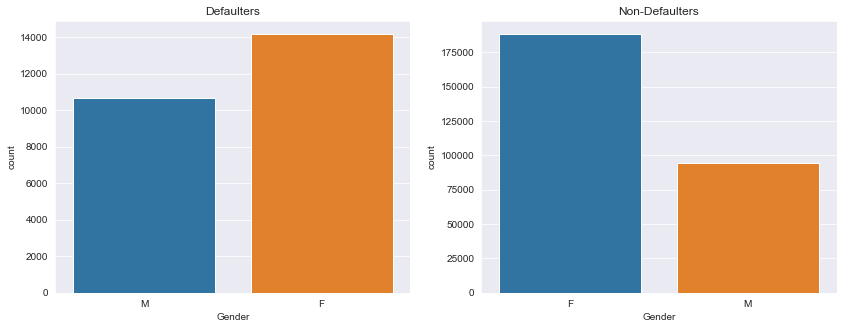

In [315]:
#Doing it using seaborn to have good visual representation

plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=inp2_Target1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=inp2_Target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

Gender Female is high in both Category

In [316]:
#Taking below un ordered categorical varialble for analysis

Cat_Unordered=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

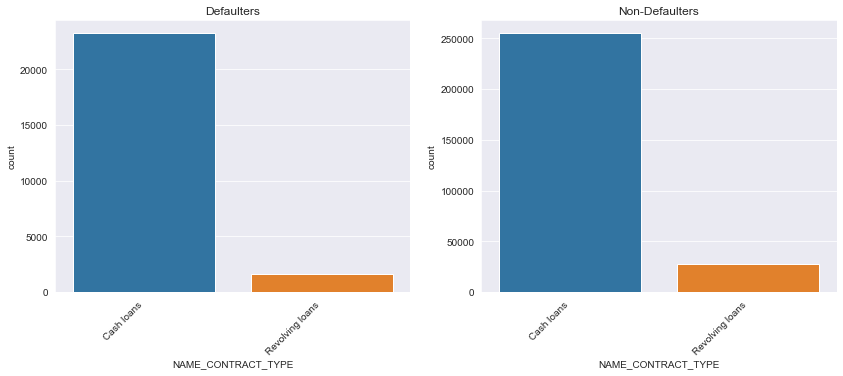

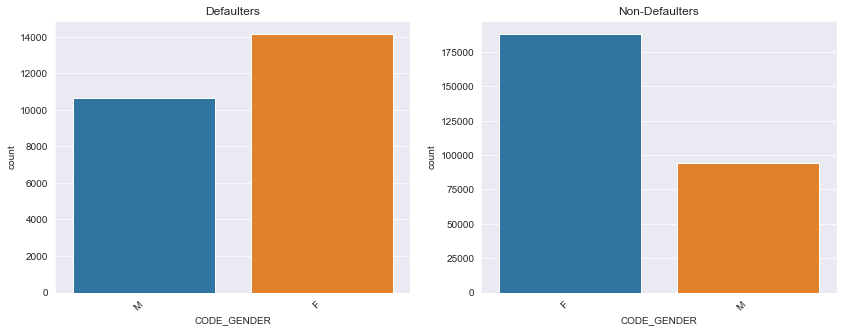

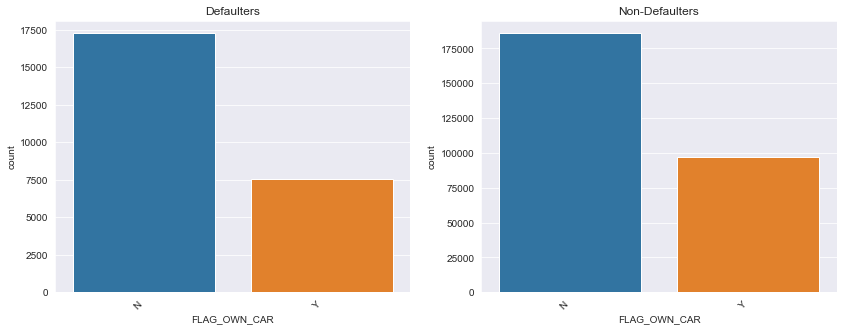

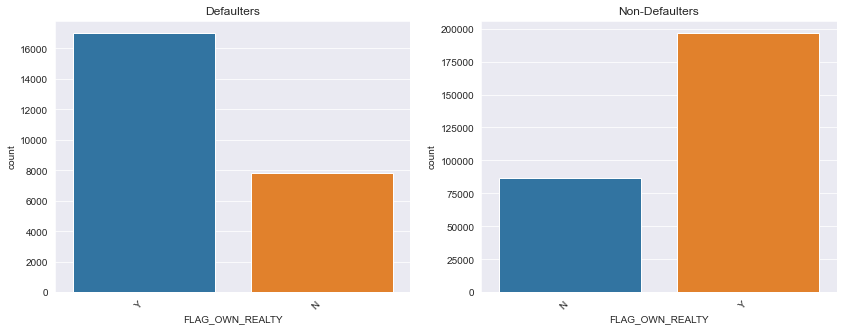

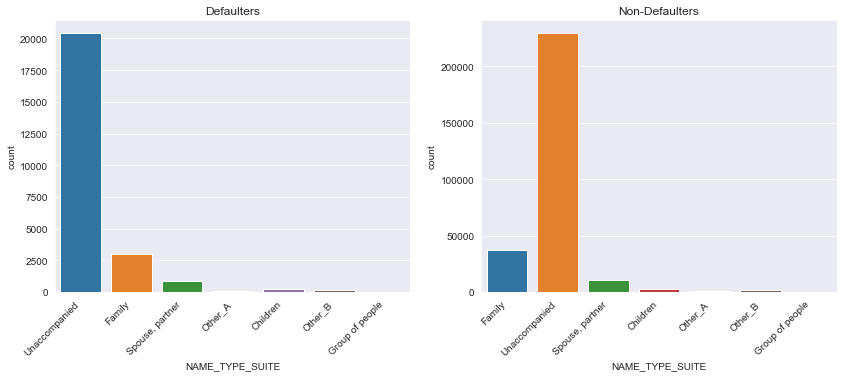

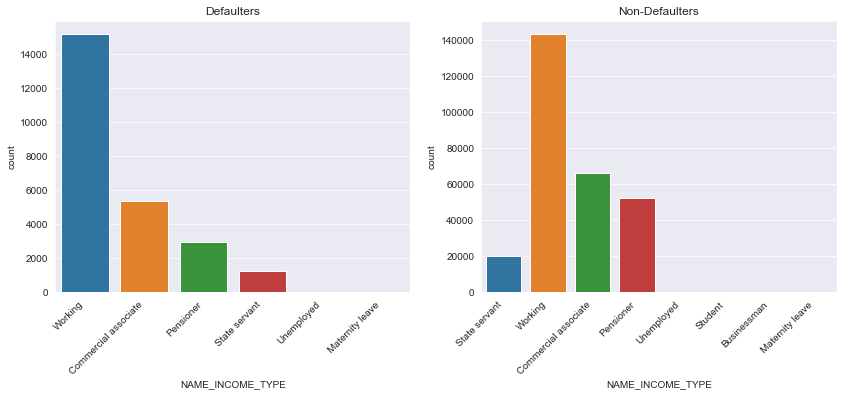

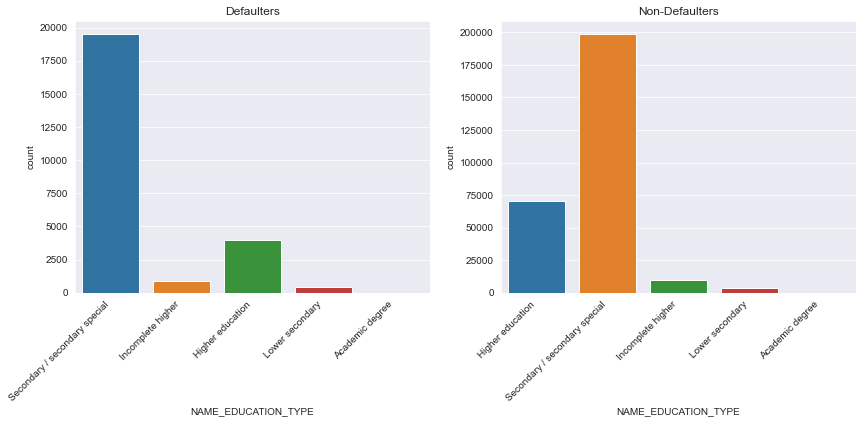

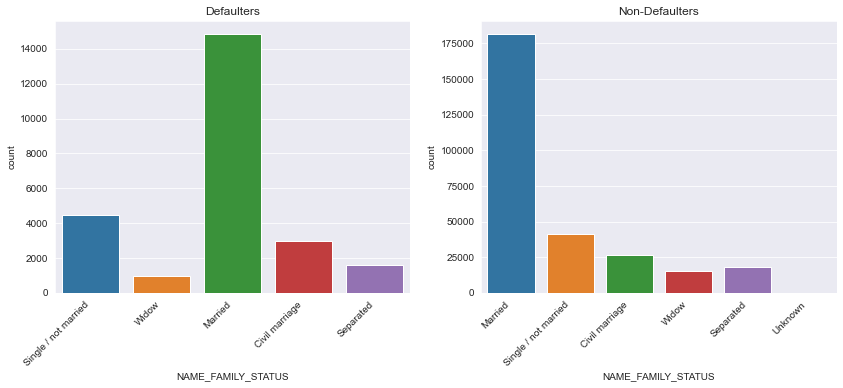

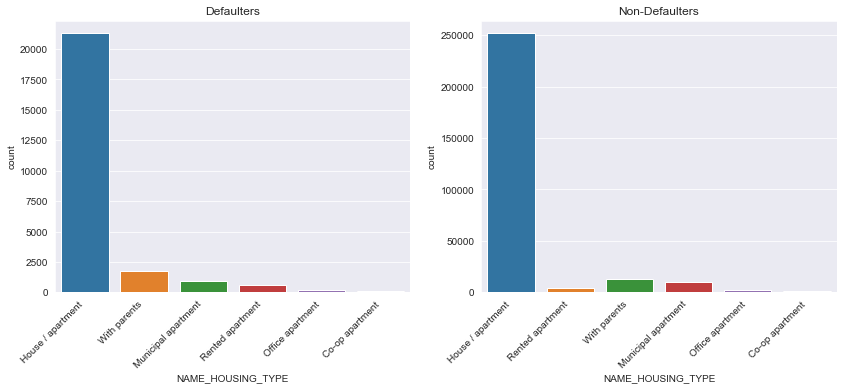

In [317]:
for x in Cat_Unordered:
    plt.figure(figsize=(14,5))
    sns.set_style('darkgrid')
    plt.subplot(1,2,1)    
    ax = sns.countplot(x = x,data=inp2_Target1)
    plt.title('Defaulters')
    ax.set(xlabel=x)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    plt.subplot(1,2,2) 
    ax = sns.countplot(x = x,data=inp2_Target0)
    plt.title('Non-Defaulters')
    ax.set(xlabel=x)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Observation

1)Contract Type

Defaulters:Cash Loans customer are High in Number compared to revolving loand

Non Defaulters:Same here,Cash Loans customer are High in Number


2)Gender:

Defaulters:Females are higher

Non Defaulters:Females are higher

3)Is customer own car:

Defaulters:Most of them not owning a car

Non Defaulters:Same here,Most of them not owning a car

4)Own Any reality:

Defaulters:Most of them not owning a reality

Non Defaulters:Same here


5)Income type:

Defaulters:Majority are working class

Non Defaulters:Here as well Majority are working clase


6)Education type:

Defaulters:Majority are Secondory/Sceondory Special

Non Defaulters:Majority are Secondory/Sceondory Special

7)Family Status:

Defaulters:Majority are Married

Non Defaulters:Majority are Married

8)Housing type:

Defaulters:Majority have house/Apartment

Non Defaulters:Majority have house/Apartment


Conclusion

Pattern is same for Defaulters and Non Defaulters

# Catogorical ordered Univarient analysis


[Text(0.5, 0, 'Childrens')]

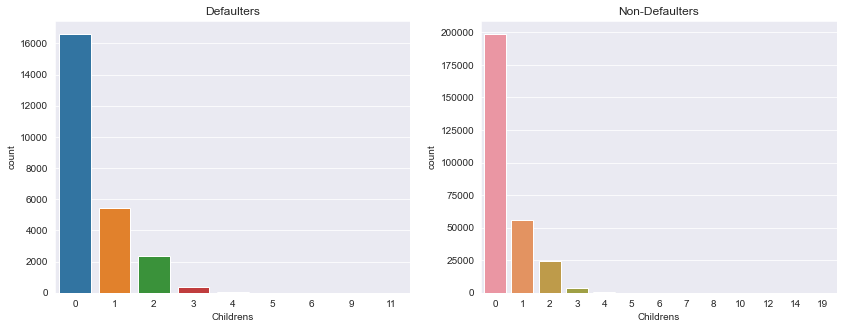

In [318]:
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.subplot(1,2,1)    
ax = sns.countplot(x ='CNT_CHILDREN',data=inp2_Target1)
plt.title('Defaulters')
ax.set(xlabel='Childrens')

plt.subplot(1,2,2) 
ax = sns.countplot(x ='CNT_CHILDREN',data=inp2_Target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Childrens')

Children count distribution also same.

# Univarient analysis for Numerical data

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

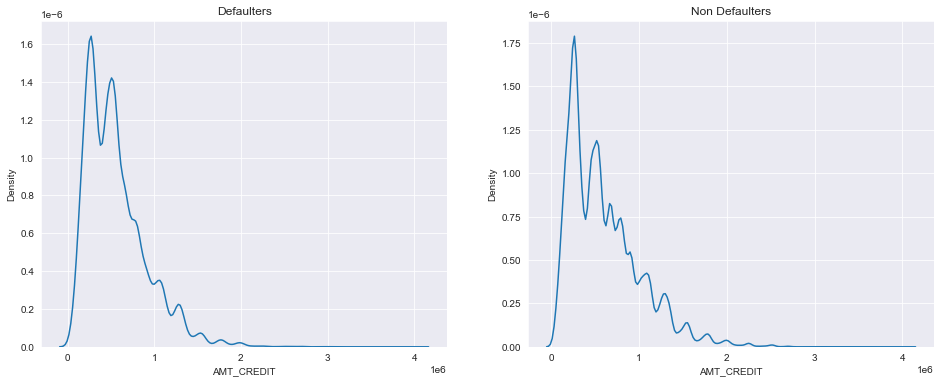

In [319]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(inp2_Target1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(inp2_Target0['AMT_CREDIT'],hist=False)

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='DAYS_BIRTH', ylabel='Density'>

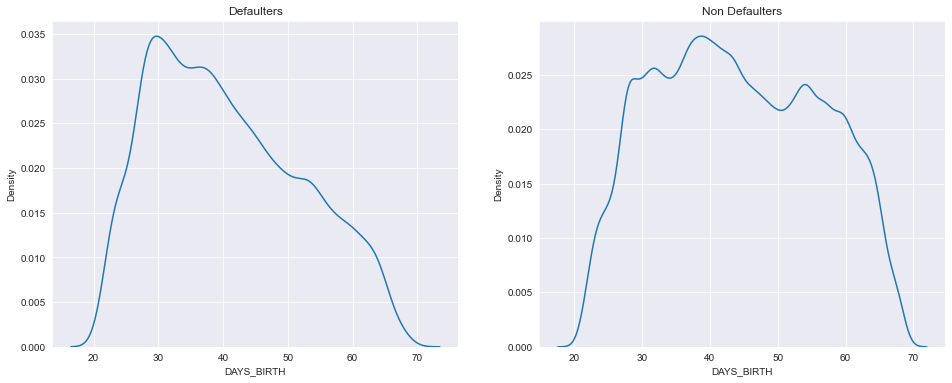

In [320]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(inp2_Target1['DAYS_BIRTH'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(inp2_Target0['DAYS_BIRTH'],hist=False)

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='DAYS_EMPLOYED', ylabel='Density'>

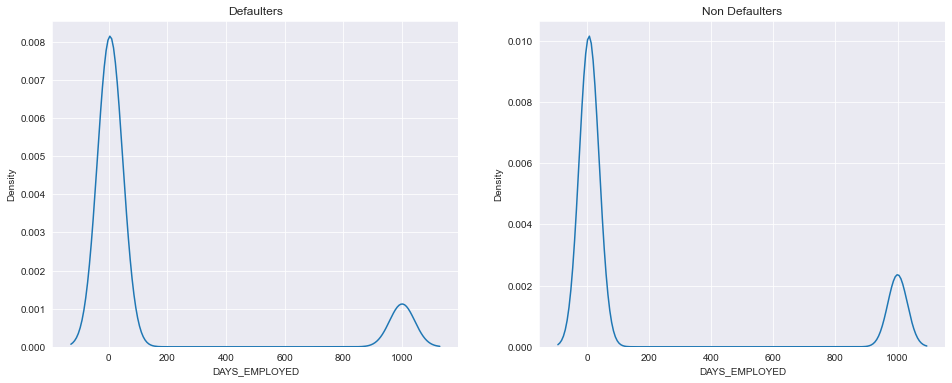

In [321]:


plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(inp2_Target1['DAYS_EMPLOYED'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(inp2_Target0['DAYS_EMPLOYED'],hist=False)

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='EXT_SOURCE_2', ylabel='Density'>

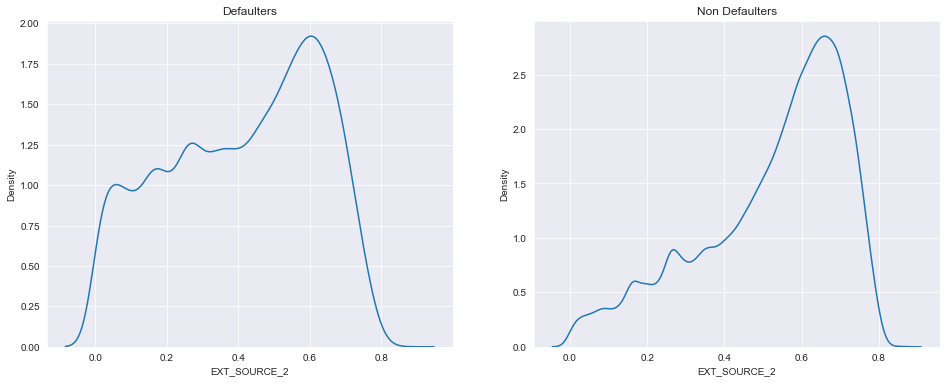

In [322]:


plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(inp2_Target1['EXT_SOURCE_2'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(inp2_Target0['EXT_SOURCE_2'],hist=False)

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='EXT_SOURCE_3', ylabel='Density'>

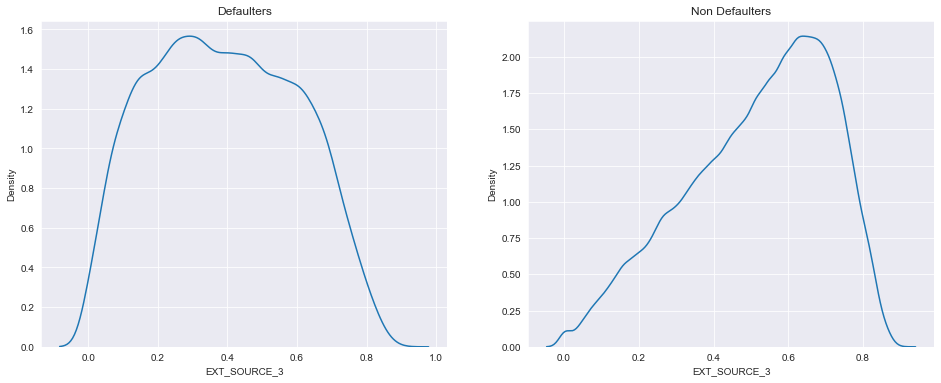

In [323]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(inp2_Target1['EXT_SOURCE_3'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(inp2_Target0['EXT_SOURCE_3'],hist=False)

Observation:


    Bank Should approve loan of Applicant between 35 to 40 Year of age
    And  should reduce approval of age 25 to 30
    Bank Should approve loan of Applicant with External rating >.6


In [324]:
#Categorizing the Age group and Year Employed in to different bukets.

inp2_Target1['Age_Group']=pd.cut(inp2_Target1.DAYS_BIRTH[:5],[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])

In [325]:
inp2_Target0['Age_Group']=pd.cut(inp2_Target0.DAYS_BIRTH[:5],[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])

In [326]:

inp2_Target1['Employed_Year_Group']=pd.cut(inp2_Target1.DAYS_EMPLOYED[:5],[0, 2, 5, 10, 15, 9999], labels= ["<2","2-5","5-10","10-15", "15+"])

In [327]:
inp2_Target0['Employed_Year_Group']=pd.cut(inp2_Target0.DAYS_EMPLOYED[:5],[0, 2, 5, 10, 15, 9999], labels= ["<2","2-5","5-10","10-15", "15+"])

[Text(0.5, 0, 'Age')]

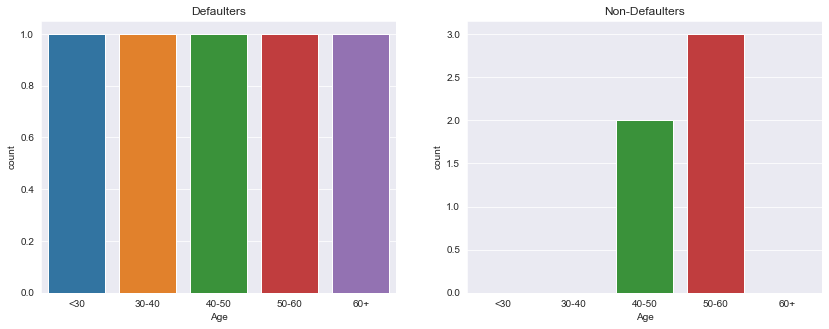

In [328]:
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.subplot(1,2,1)    
ax = sns.countplot(x ='Age_Group',data=inp2_Target1)
plt.title('Defaulters')
ax.set(xlabel='Age')

plt.subplot(1,2,2) 
ax = sns.countplot(x ='Age_Group',data=inp2_Target0)
plt.title('Non-Defaulters')
ax.set(xlabel='Age')

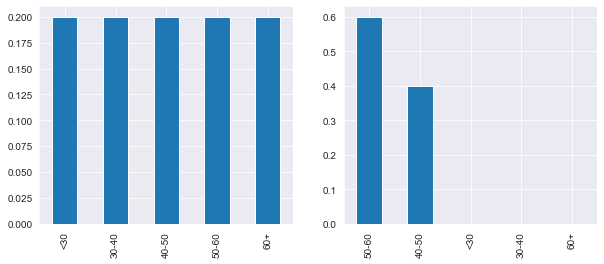

In [329]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
inp2_Target1.Age_Group.value_counts(normalize= True).plot.bar()

#plt.figure(figsize=[10,4])
plt.subplot(1, 2, 2)
inp2_Target0.Age_Group.value_counts(normalize= True).plot.bar()
plt.show()

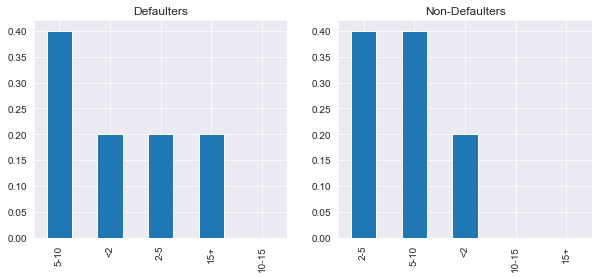

In [330]:
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
plt.title('Defaulters')
inp2_Target1.Employed_Year_Group.value_counts(normalize= True).plot.bar()

#plt.figure(figsize=[10,4])
plt.subplot(1, 2, 2)
plt.title('Non-Defaulters')
inp2_Target0.Employed_Year_Group.value_counts(normalize= True).plot.bar()
plt.show()

Observation:
    
 Age:
      
      
      Defaulters are equally distributed in all Age group
 
     Non -Defaulters are mostly between 40 to 60 years of age
 
 Number of Days Employed:
 
     Defaulters:60% of defaulters are having experinec between 5 to 10 years
     Non Defaulters:2 to 5 years & 5 to 10 years are 40%
     
     
     

# Bi Varient Analysis


Numeric-Numeric 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

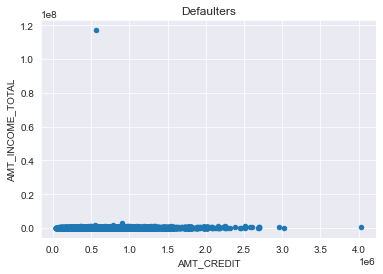

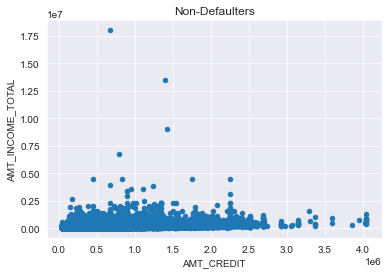

In [331]:
#plt.figure(figsize=[10,4])
#plt.subplot(1, 2, 1)

#plt.scatter(inp2_Target1.AMT_CREDIT, inp2_Target1.AMT_INCOME_TOTAL)
inp2_Target1.plot.scatter(x='AMT_CREDIT', y='AMT_INCOME_TOTAL')
plt.title('Defaulters')

#plt.subplot(1, 2, 2)

#plt.scatter(inp2_Target0.AMT_CREDIT, inp2_Target0.AMT_INCOME_TOTAL)
inp2_Target0.plot.scatter(x='AMT_CREDIT', y='AMT_INCOME_TOTAL')
plt.title('Non-Defaulters')
plt.show()
#plt.show()


Higher income applicant are less defaulter.

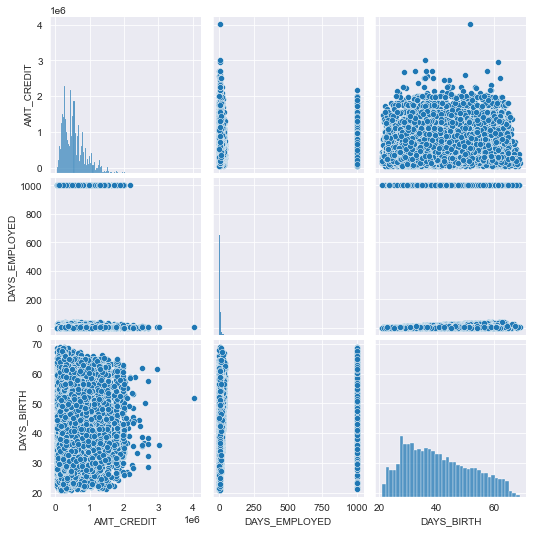

In [332]:
sns.pairplot(data=inp2_Target1, vars=['AMT_CREDIT',"DAYS_EMPLOYED", "DAYS_BIRTH"])
plt.show()

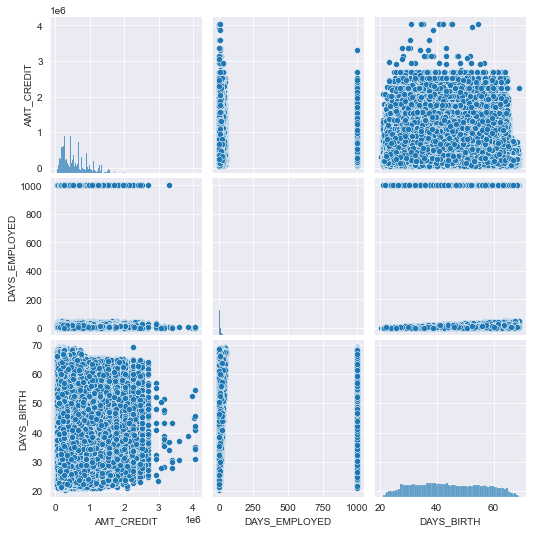

In [333]:
sns.pairplot(data=inp2_Target0, vars=['AMT_CREDIT',"DAYS_EMPLOYED", "DAYS_BIRTH"])
plt.show()

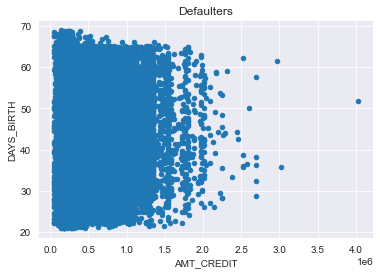

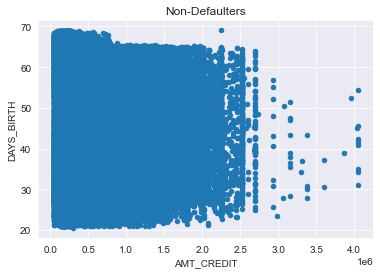

In [334]:
    inp2_Target1.plot.scatter(x='AMT_CREDIT', y='DAYS_BIRTH')
plt.title('Defaulters')

#plt.subplot(1, 2, 2)

#plt.scatter(inp2_Target0.AMT_CREDIT, inp2_Target0.AMT_INCOME_TOTAL)
inp2_Target0.plot.scatter(x='AMT_CREDIT', y='DAYS_BIRTH')
plt.title('Non-Defaulters')
plt.show()
#plt.show()

Observation

    Bank Should provide loan to applicant applying for more than 3000000
    Bank Should not reject any Application from Applicant between Age 35 to 50


Correlation heat map

In [335]:
#Non Defaulters

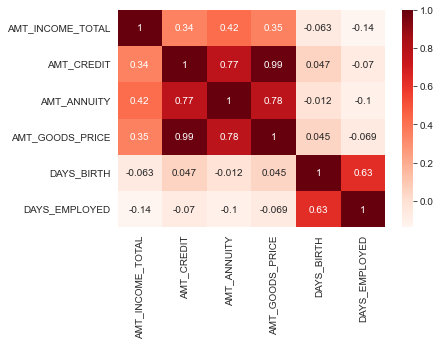

In [336]:
sns.heatmap( inp2_Target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].corr(), annot= True, cmap= "Reds")
plt.show()

Deafultor Correlation Observation:

Amount good price and amount credit have very high correlation

Amount good proce and amount annuity have high correlation



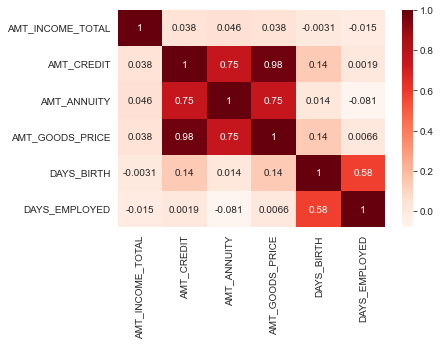

In [337]:
sns.heatmap( inp2_Target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].corr(), annot= True, cmap= "Reds")
plt.show()

 Defaulters
Amount good price and amount credit have very high correlation

Amount good proce and amount annuity have high correlation


# Analysis on Numerical catogorical Variable

In [338]:
Categories2=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','Age_Group','Employed_Year_Group']

In [339]:
#Defaulters

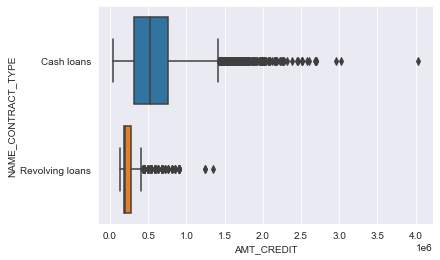

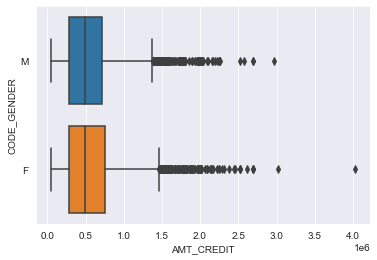

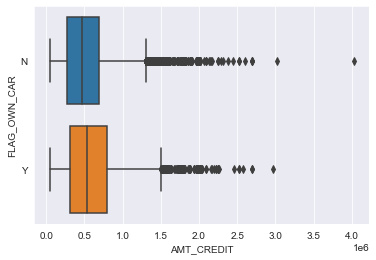

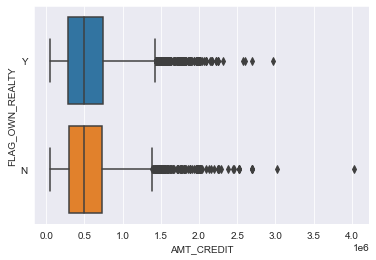

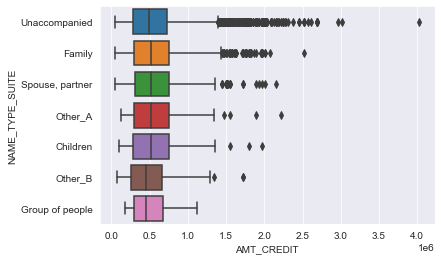

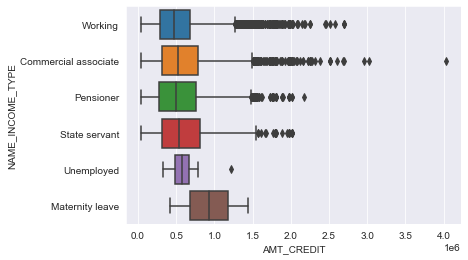

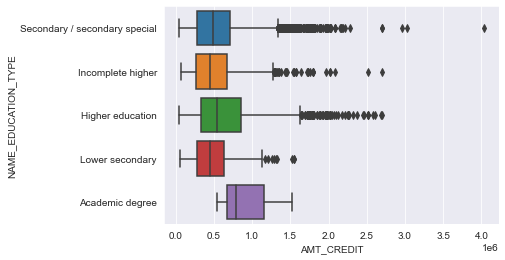

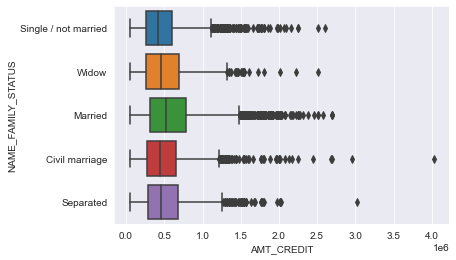

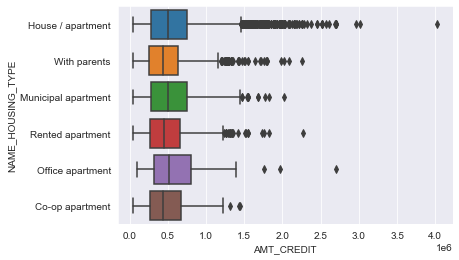

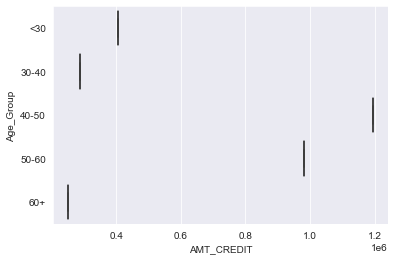

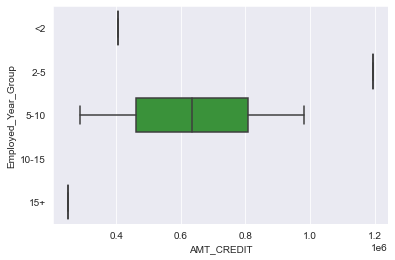

In [340]:
for x in Categories2:
    sns.boxplot(data=inp2_Target1, x="AMT_CREDIT",y=x)
    plt.show()

Analysis:
    
    Credit amount of Cash loan is higher and Revolving loans is less
    Person owning car defaulting is comparitively higher
    Possibility of defaulting is higher for person in maternity leave
    Person with acedemic degree has higher possibility to default
    Person with  5 to 10 years of experinece have higher chance of defaulting
    
    

In [341]:
#Non Defaulters

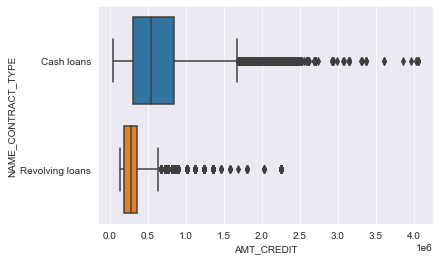

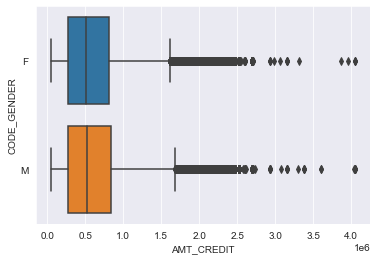

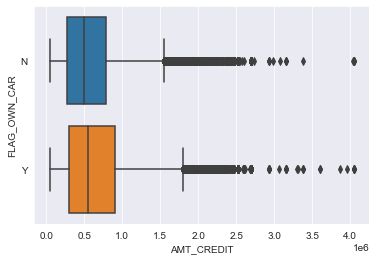

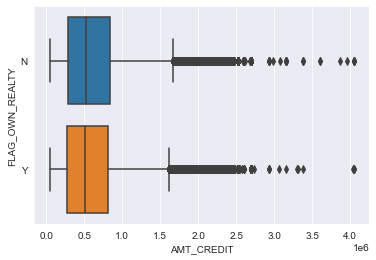

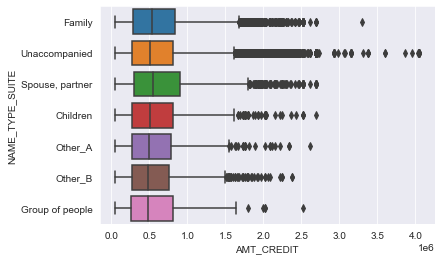

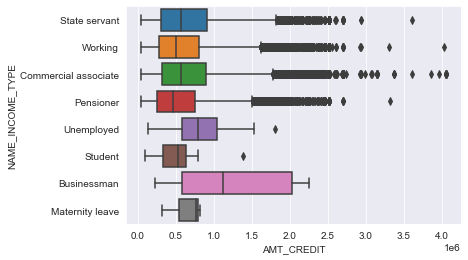

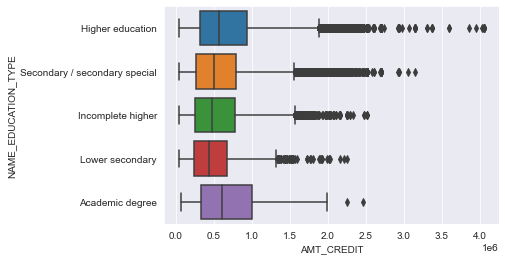

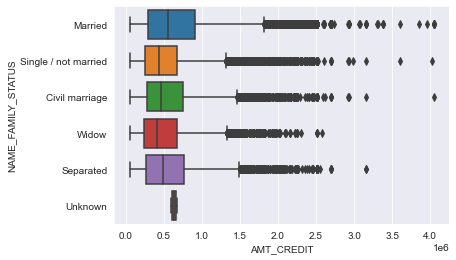

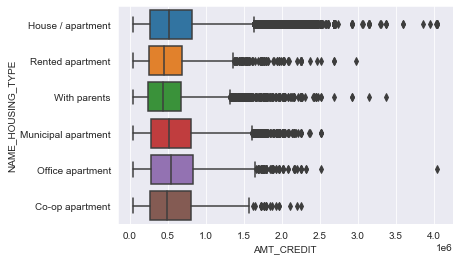

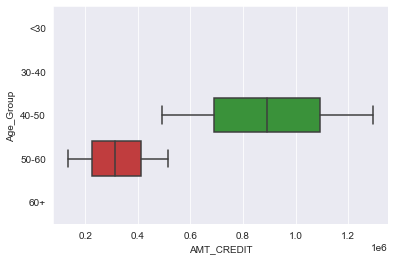

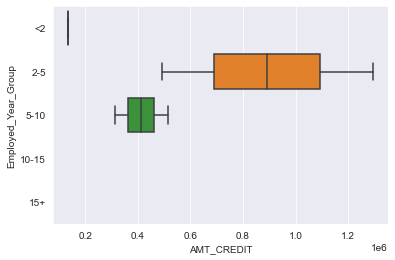

In [342]:
for x in Categories2:
    sns.boxplot(data=inp2_Target0, x="AMT_CREDIT",y=x)
    plt.show()

Analysis:
    
    Bussiness men have least possibility of defaulting,then comes unemployed
    Age group with 40 to 50 least possibility of defaulting
    Person with 2 to 5 year experince has least possibility of defaulting



# Analysis on previous application

In [343]:
Previous_inp1=pd.read_csv(r'previous_application.csv')# Reading the data

In [344]:
Previous_inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
Previous_inp1.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [346]:
Previous_inp1.shape

(1670214, 37)

In [347]:
Previous_inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [348]:
Previous_inp1.isnull().sum()
((Previous_inp1.isnull().sum()/len(Previous_inp1))*100).sort_values(ascending=False) # Checking for null values

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [349]:
# columns having more than 30% missing values
Previou_App_High_Missing_Value_col = (Previous_inp1.columns[(round(100*(Previous_inp1.isnull().sum()/len(Previous_inp1.index)), 2)) >= 30]).tolist()
Previou_App_High_Missing_Value_col



['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [350]:
#Drop the columns with >30% Missing value
Previous_inp2 = Previous_inp1.drop(Previou_App_High_Missing_Value_col,axis=1)

In [351]:
#Drop Some of the irrelavent columns
irrelavent_col=['NFLAG_LAST_APPL_IN_DAY','NFLAG_LAST_APPL_IN_DAY',
'FLAG_LAST_APPL_PER_CONTRACT',
'HOUR_APPR_PROCESS_START',
'WEEKDAY_APPR_PROCESS_START']

Previous_inp2 = Previous_inp2.drop(irrelavent_col,axis=1)

In [352]:
Previous_inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [353]:
#Checking the value of Object columns
Previous_App_Cat_Col=['CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE',
                     'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE']

for x in Previous_App_Cat_Col:
    VC=Previous_inp2[x].value_counts()
    print(VC)
    

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64
XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine     

Observation :Multiple columns have XNA or XAP

In [354]:
#Replacing all XNA and XAP to null

Previous_inp2.replace('XNA',np.nan,inplace=True)
Previous_inp2.replace('XAP',np.nan,inplace=True)

In [355]:
Previous_inp2.isnull().sum()
((Previous_inp2.isnull().sum()/len(Previous_inp1))*100).sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE    95.830774
CODE_REJECT_REASON        81.327123
NAME_PRODUCT_TYPE         63.684414
NAME_GOODS_CATEGORY       56.927376
NAME_SELLER_INDUSTRY      51.234153
NAME_PAYMENT_TYPE         37.563091
NAME_YIELD_GROUP          30.966990
AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
NAME_PORTFOLIO            22.286366
NAME_CLIENT_TYPE           0.116213
PRODUCT_COMBINATION        0.020716
NAME_CONTRACT_TYPE         0.020716
AMT_CREDIT                 0.000060
SK_ID_CURR                 0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
AMT_APPLICATION            0.000000
SK_ID_PREV                 0.000000
dtype: float64

In [356]:
# columns having more than 30% missing values
Previou_Inp2_High_Missing_Value_col = (Previous_inp2.columns[(round(100*(Previous_inp2.isnull().sum()/len(Previous_inp2.index)), 2)) >= 30]).tolist()
Previou_Inp2_High_Missing_Value_col


['NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [357]:
#Drop the columns with >30% Missing value
Previous_inp2 = Previous_inp2.drop(Previou_Inp2_High_Missing_Value_col,axis=1)

In [358]:
(Previous_inp2.isnull().sum()/len(Previous_inp2))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.020716
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_GOODS_PRICE         23.081773
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
NAME_CLIENT_TYPE         0.116213
NAME_PORTFOLIO          22.286366
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
dtype: float64

#AMT ANNUITY ,AMT_Goods_price,Name portfilio and CNT_Payment have more than 20 % of missing values.
We may drop this rows  from the analysis.

In [359]:
#Checking for the outliers in the numerical col

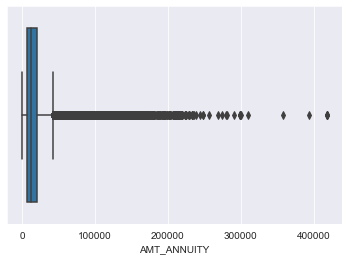

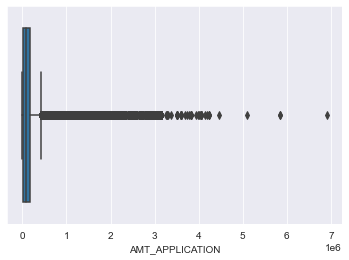

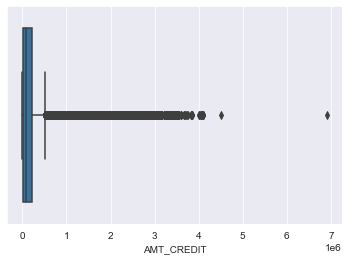

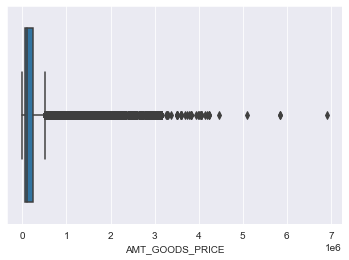

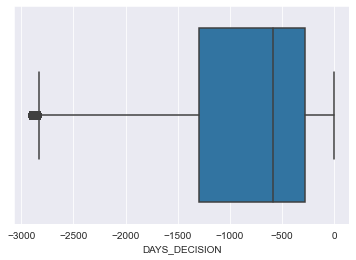

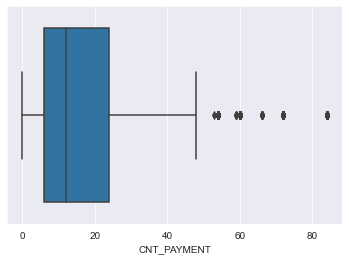

In [360]:

Previous_App_Numeric=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for x in Previous_App_Numeric:
    sns.boxplot(Previous_inp2[x])
    plt.show()

 For AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE the difference between upper fence and maximum value is very higher

Days Decision column is negative,converting to absolute number and to months

In [361]:
Previous_inp2['Month_Decision']=Previous_inp2.DAYS_DECISION.apply(lambda x:abs(x)/30)

In [362]:
Previous_inp2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'Month_Decision'],
      dtype='object')

# Univarient Analysis

Un ordered Catogorical

In [363]:
Prev_unorderd=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE','PRODUCT_COMBINATION']

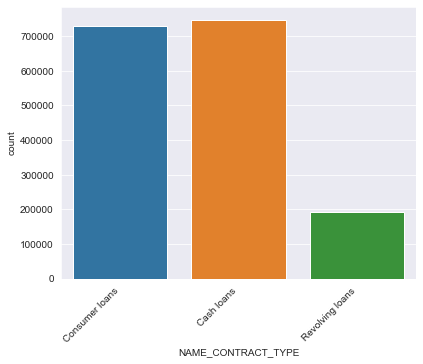

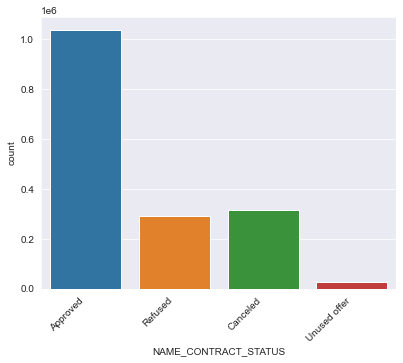

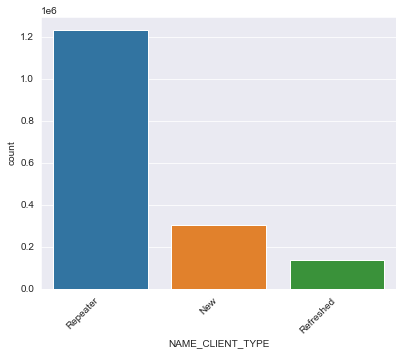

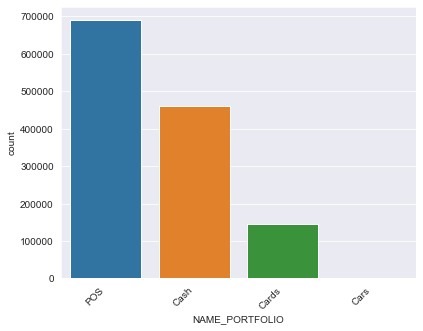

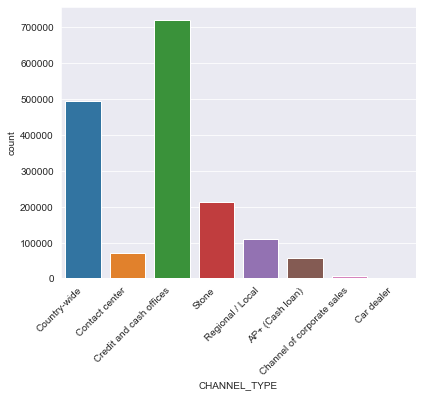

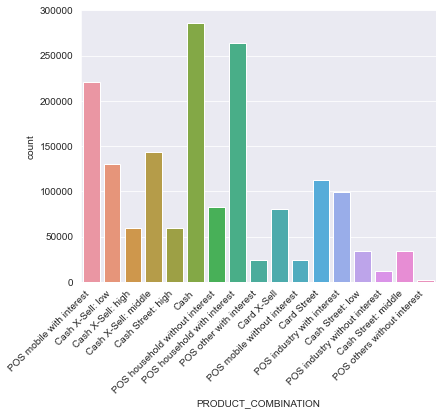

In [364]:
for x in Prev_unorderd:
    plt.figure(figsize=(14,5))
    sns.set_style('darkgrid')
    plt.subplot(1,2,1)    
    ax = sns.countplot(x = x,data=Previous_inp2)
    ax.set(xlabel=x)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

Observation:
    
    
   Most of the previous applications are Consumer loans and Cash loans

Most of the previous applications are approved

Application for POS is higher then comes Cash

Most of the applicant applied for loan multiple times


# ##Univarient Analysis for Continous Variable

[Text(0.5, 0, 'Months')]

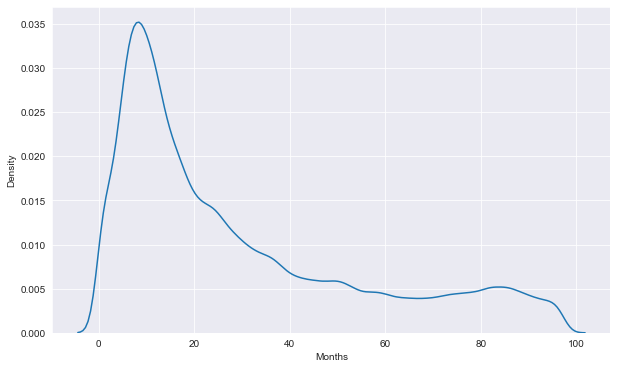

In [365]:
plt.figure(figsize=(10,6))
ax = sns.distplot(Previous_inp2['Month_Decision'],hist=False)
ax.set(xlabel='Months')

For most of the application it took more than 10 months to get proccessed and for some application it tool upto 100 Month

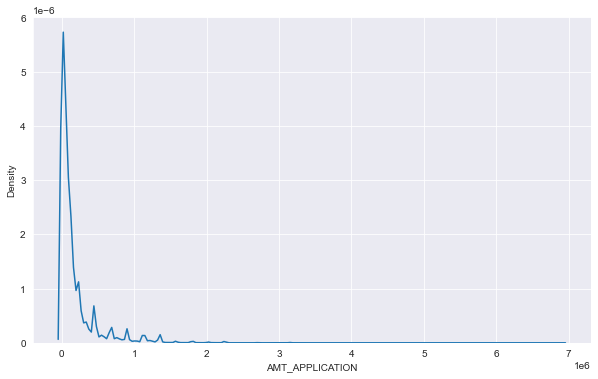

In [366]:
plt.figure(figsize=(10,6))
#plt.figure(figsize=[10,4])

ax = sns.distplot(Previous_inp2['AMT_APPLICATION'],hist=False)

Most of Application are for lower amount

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

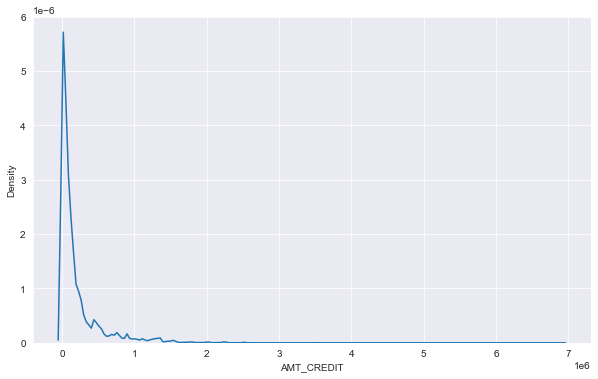

In [367]:
plt.figure(figsize=(10,6))
sns.distplot(Previous_inp2['AMT_CREDIT'],hist=False)

Most of the applicant recieved as much money requested

# BiVarient Analysis

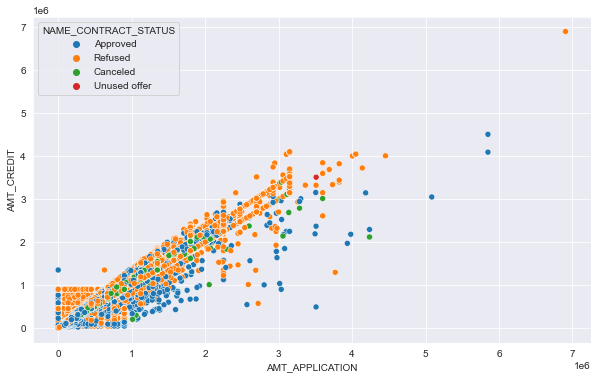

In [368]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=Previous_inp2)

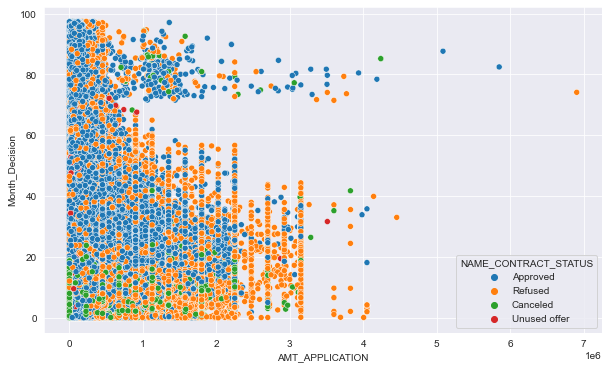

In [369]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','Month_Decision',hue='NAME_CONTRACT_STATUS', data=Previous_inp2)

More application are around lesser amount, time taken for taking decision on lesser comparatively higher


# Merging of current application with previous application

In [370]:
inp2.columns # Current application input coloumns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_B

In [371]:
Previous_inp2.columns # Previous applocation input columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'Month_Decision'],
      dtype='object')

In [372]:
#Selct columns to merge  from current application

Current_app_cols_to_merge=['SK_ID_CURR', 'TARGET','CODE_GENDER','AMT_INCOME_TOTAL','DAYS_BIRTH',
       'DAYS_EMPLOYED','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE','EXT_SOURCE_2',
       'EXT_SOURCE_3']

In [373]:
Current_app_df_to_merge=inp2[Current_app_cols_to_merge] # Merging of current and previous application

In [374]:
Merged_df=pd.merge(Previous_inp2,Current_app_df_to_merge,on='SK_ID_CURR',how='left')

In [375]:
Merged_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'Month_Decision', 'TARGET', 'CODE_GENDER',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

In [376]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669868 non-null  object 
 3   AMT_ANNUITY           1297979 non-null  float64
 4   AMT_APPLICATION       1670214 non-null  float64
 5   AMT_CREDIT            1670213 non-null  float64
 6   AMT_GOODS_PRICE       1284699 non-null  float64
 7   NAME_CONTRACT_STATUS  1670214 non-null  object 
 8   DAYS_DECISION         1670214 non-null  int64  
 9   NAME_CLIENT_TYPE      1668273 non-null  object 
 10  NAME_PORTFOLIO        1297984 non-null  object 
 11  CHANNEL_TYPE          1670214 non-null  object 
 12  SELLERPLACE_AREA      1670214 non-null  int64  
 13  CNT_PAYMENT           1297984 non-null  float64
 14  PRODUCT_COMBINATION   1669868 non-

In [377]:
Merged_df.isnull().sum()# Checking for null values

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE         346
AMT_ANNUITY             372235
AMT_APPLICATION              0
AMT_CREDIT                   1
AMT_GOODS_PRICE         385515
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_CLIENT_TYPE          1941
NAME_PORTFOLIO          372230
CHANNEL_TYPE                 0
SELLERPLACE_AREA             0
CNT_PAYMENT             372230
PRODUCT_COMBINATION        346
Month_Decision               0
TARGET                  256568
CODE_GENDER             256568
AMT_INCOME_TOTAL        256568
DAYS_BIRTH              256568
DAYS_EMPLOYED           256568
NAME_INCOME_TYPE        256568
NAME_EDUCATION_TYPE     256568
NAME_FAMILY_STATUS      256568
NAME_HOUSING_TYPE       256568
EXT_SOURCE_2            256995
EXT_SOURCE_3            256995
dtype: int64

Many null values in target,as explained in the data descreption,its not mandatory that every current applicants should be part of previous application.so for this analysis droping all rows with target= null

In [378]:
Merged_df= Merged_df[(~(np.isnan(Merged_df['TARGET'])))]   # Dropping target rows with 'NAN'

In [379]:
Merged_df.shape

(1413646, 27)

In [380]:
(Merged_df.isnull().sum()/len(Merged_df))*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.022141
AMT_ANNUITY             21.731607
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000071
AMT_GOODS_PRICE         22.602264
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
NAME_CLIENT_TYPE         0.109150
NAME_PORTFOLIO          21.731254
CHANNEL_TYPE             0.000000
SELLERPLACE_AREA         0.000000
CNT_PAYMENT             21.731254
PRODUCT_COMBINATION      0.022141
Month_Decision           0.000000
TARGET                   0.000000
CODE_GENDER              0.000000
AMT_INCOME_TOTAL         0.000000
DAYS_BIRTH               0.000000
DAYS_EMPLOYED            0.000000
NAME_INCOME_TYPE         0.000000
NAME_EDUCATION_TYPE      0.000000
NAME_FAMILY_STATUS       0.000000
NAME_HOUSING_TYPE        0.000000
EXT_SOURCE_2             0.030206
EXT_SOURCE_3             0.030206
dtype: float64

# #Univarient Analysis

In [381]:
Merged_df.TARGET.value_counts()

0.0    1291286
1.0     122360
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

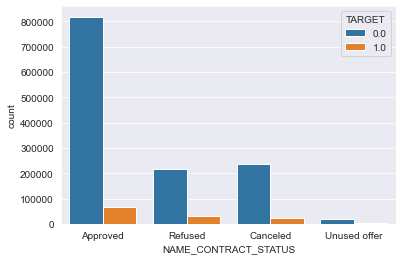

In [382]:
sns.countplot(x = Merged_df.NAME_CONTRACT_STATUS,data=Merged_df,hue='TARGET')


<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

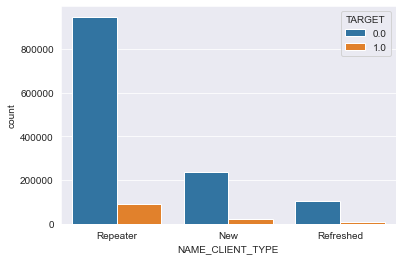

In [383]:
sns.countplot(x = Merged_df.NAME_CLIENT_TYPE,data=Merged_df,hue='TARGET')

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

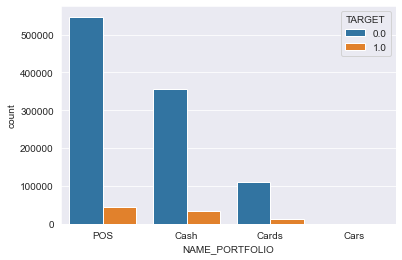

In [384]:

sns.countplot(x = Merged_df.NAME_PORTFOLIO,data=Merged_df,hue='TARGET')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

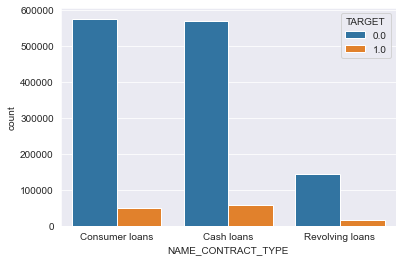

In [385]:
sns.countplot(x = Merged_df.NAME_CONTRACT_TYPE,data=Merged_df,hue='TARGET')

Observation:




   There are Non Defaulters in refused category, Bank Should review such customer and provide loan.

   There are few Defaulters in Approved category

   Repeated Loan Applicant are less likely to Default.


# Bi varient analysis

Correlation of numeric variables

In [386]:
Numeric=[ 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
         'Month_Decision',
       'AMT_INCOME_TOTAL',
       'NAME_EDUCATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

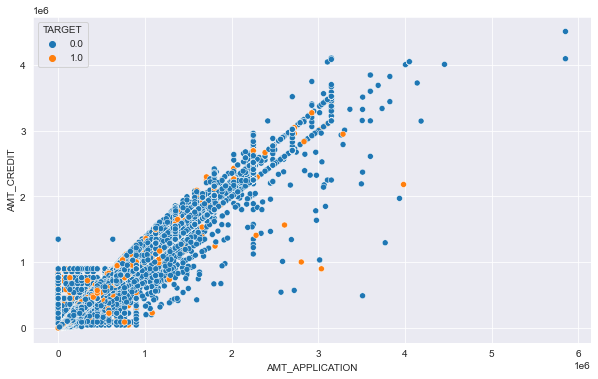

In [387]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='TARGET', data=Merged_df)

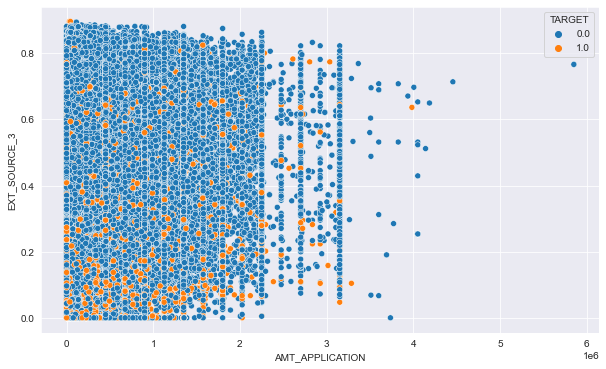

In [388]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','EXT_SOURCE_3',hue='TARGET', data=Merged_df)

Observation:
    
    
    Bank should review its Criteria of rejection for lesser amount applicant as most of them are not defaulter
    Previous Applicant with less external score default rate is comparatively high


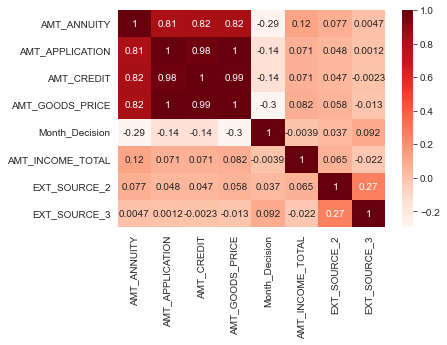

In [389]:
sns.heatmap( Merged_df[[ 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
         'Month_Decision',
       'AMT_INCOME_TOTAL',
       'NAME_EDUCATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr(), annot= True, cmap= "Reds")
plt.show()

AMT Credit and Amount Goods price  have  very high correlation
AMT Application and AMT credit also have high correlation



# Overall Conclusion

  
     Bank Should approve loan of Applicant between 35 to 50 Year of age.

     Bank Should Entertain loan for Business Man ,between 40 to 50 Years of age. 

     Also Employee group with 2-5 year of experience

     Bank Should approve loan of Applicant with External rating >.6

     Bank Should provide loan to applicant applying for more than 3000000.

     Bank Should be cautious while giving Loan to Applicant who is Married ,Under Maternity leave and having academic degree.

     And  should reduce approval of age 25 to 30.

    More application are around lesser amount, time taken for taking decision on lesser comparatively higher,bank should improve it
